# Analysis of Technology Stocks' Performance on 18th April 2019
Source: Yahoo! Finance


In [1]:
import pandas as pd
import numpy as np

In [2]:
tech_stocks = pd.read_csv('yahoofin.csv', index_col = 'symbol')

A peek at the data:

In [3]:
tech_stocks.head()

,beta_3y_mthly,change,market_cap,name,one_yr_target_est,pe_ratio,perc_change,price,volume,volume_3_mth_avg
symbol,,,,,,,,,,
AAPL,0.91,0.73,961.257B,Apple Inc.,193.12,16.82,+0.36%,203.86,24.196M,28.307M
TXN,1.12,-0.09,108.42B,Texas Instruments Incorporated,109.32,20.65,-0.08%,115.51,4.196M,5.499M
NVDA,2.37,-0.99,113.362B,NVIDIA Corporation,183.19,28.10,-0.53%,186.30,9.525M,15.613M
ACN,1.14,-0.34,113.923B,Accenture plc,183.52,25.99,-0.19%,178.61,1.279M,1.976M
CRM,1.05,0.65,120.873B,"salesforce.com, inc.",181.63,109.08,+0.42%,155.99,4.2M,5.305M


Reordering columns:

In [4]:
tech_stocks = tech_stocks[['name', 'price', 'change', 'perc_change', 'volume', 'volume_3_mth_avg', 'market_cap', 'pe_ratio', 'beta_3y_mthly', 'one_yr_target_est']]

In [5]:
tech_stocks.head(10)

,name,price,change,perc_change,volume,volume_3_mth_avg,market_cap,pe_ratio,beta_3y_mthly,one_yr_target_est
symbol,,,,,,,,,,
AAPL,Apple Inc.,203.86,0.73,+0.36%,24.196M,28.307M,961.257B,16.82,0.91,193.12
TXN,Texas Instruments Incorporated,115.51,-0.09,-0.08%,4.196M,5.499M,108.42B,20.65,1.12,109.32
NVDA,NVIDIA Corporation,186.30,-0.99,-0.53%,9.525M,15.613M,113.362B,28.10,2.37,183.19
ACN,Accenture plc,178.61,-0.34,-0.19%,1.279M,1.976M,113.923B,25.99,1.14,183.52
CRM,"salesforce.com, inc.",155.99,0.65,+0.42%,4.2M,5.305M,120.873B,109.08,1.05,181.63
IBM,International Business Machines Corporation,140.33,1.22,+0.88%,4.705M,4.254M,124.875B,14.77,1.68,143.72
AVGO,Broadcom Inc.,318.62,-1.91,-0.60%,2.655M,2.694M,126.124B,21.04,0.27,312.45
ADBE,Adobe Inc.,270.57,1.12,+0.42%,2.029M,2.871M,132.025B,50.20,1.03,292.67
SAP,SAP SE,112.97,0.66,+0.59%,"481,087","722,966",135.003B,27.29,0.86,122.47


In [6]:
tech_stocks.shape

(467, 10)

There are 467 stocks. Performance is captured on 9 variables excluding name.

In [7]:
tech_stocks.dtypes

name                  object
price                 object
change               float64
perc_change           object
volume                object
volume_3_mth_avg      object
market_cap            object
pe_ratio             float64
beta_3y_mthly        float64
one_yr_target_est     object
dtype: object

### Converting strings values into float:

In [8]:
tech_stocks.price = tech_stocks.price.str.replace(',', '').astype(float)

In [9]:
tech_stocks.perc_change = tech_stocks.perc_change.str.replace('%', '').astype(float)

In [10]:
tech_stocks.volume = tech_stocks.volume.str.replace(',', '')
tech_stocks.volume = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x) for x in tech_stocks.volume]

Some columns have a mix of M (for mn), B (for bn) and normal values. Bringing them into same denomination.

In [11]:
tech_stocks.volume_3_mth_avg = tech_stocks.volume_3_mth_avg.str.replace(',', '')
tech_stocks.volume_3_mth_avg = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x) for x in tech_stocks.volume_3_mth_avg]

In [15]:
tech_stocks.market_cap = tech_stocks.market_cap.str.replace(',', '')
tech_stocks.market_cap = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x.replace('B', ''))*1000000000 if 'B' in x else float(x) for x in tech_stocks.market_cap]

In [18]:
tech_stocks.one_yr_target_est = tech_stocks.one_yr_target_est.str.replace(',', '').astype(float)

In [19]:
tech_stocks.sample(10)

,name,price,change,perc_change,volume,volume_3_mth_avg,market_cap,pe_ratio,beta_3y_mthly,one_yr_target_est
symbol,,,,,,,,,,
MX,MagnaChip Semiconductor Corporation,8.36,0.13,1.58,240531.0,303450.0,2.850040e+08,NaN,1.81,10.10
EBIX,"Ebix, Inc.",47.50,-0.37,-0.77,345715.0,320246.0,1.451000e+09,16.10,2.09,95.00
ECOM,ChannelAdvisor Corporation,11.43,-0.06,-0.52,64376.0,102300.0,3.177250e+08,NaN,-0.06,16.00
DOCU,"DocuSign, Inc.",52.79,-0.39,-0.73,1903000.0,2233000.0,8.969000e+09,NaN,NaN,66.10
SAIC,Science Applications International Corporation,73.01,0.59,0.81,612672.0,429853.0,4.331000e+09,23.48,1.11,89.67
JCOM,"j2 Global, Inc.",88.40,-0.49,-0.55,168356.0,350490.0,4.310000e+09,34.13,0.92,98.75
DQ,Daqo New Energy Corp.,37.30,-0.17,-0.45,220733.0,360664.0,4.798200e+08,12.60,2.83,51.67
BRKS,"Brooks Automation, Inc.",31.70,-0.11,-0.35,334552.0,609590.0,2.281000e+09,19.73,2.15,41.67
UEIC,Universal Electronics Inc.,37.69,-0.23,-0.61,101436.0,145195.0,5.217280e+08,44.34,1.68,45.00


### Sanity check of conversions

In [20]:
# Confirming if all data types are as required
tech_stocks.dtypes

name                  object
price                float64
change               float64
perc_change          float64
volume               float64
volume_3_mth_avg     float64
market_cap           float64
pe_ratio             float64
beta_3y_mthly        float64
one_yr_target_est    float64
dtype: object

In [23]:
print(tech_stocks.volume[tech_stocks.index == 'SAP'])
print(tech_stocks.volume[tech_stocks.index == 'IBM'])

symbol
SAP    481087.0
Name: volume, dtype: float64
symbol
IBM    4705000.0
Name: volume, dtype: float64


In [24]:
print(tech_stocks.volume_3_mth_avg[tech_stocks.index == 'FTV-PA'])
print(tech_stocks.volume_3_mth_avg[tech_stocks.index == 'NXPI'])

symbol
FTV-PA    9215.0
Name: volume_3_mth_avg, dtype: float64
symbol
NXPI    3779000.0
Name: volume_3_mth_avg, dtype: float64


In [25]:
print(tech_stocks.market_cap[tech_stocks.index == 'MINDP'])
print(tech_stocks.market_cap[tech_stocks.index == 'AAPL'])

symbol
MINDP    46660000.0
Name: market_cap, dtype: float64
symbol
AAPL    9.612570e+11
Name: market_cap, dtype: float64


In [39]:
# Highest value in each variable
tech_stocks.iloc[: , 1:].apply(lambda x: max(x), axis=0)

price                1.241470e+03
change               6.000000e+00
perc_change          1.536000e+01
volume               3.913700e+07
volume_3_mth_avg     7.733600e+07
market_cap           9.612570e+11
pe_ratio             9.537500e+02
beta_3y_mthly        4.050000e+00
one_yr_target_est    2.446300e+03
dtype: float64

-----------------

## Percentage Change over Previous Day

It was not a good day for the technology stocks. 
* 242 stocks out of 467 had negative returns.
* Mean percentage change over previous day was -0.24% (with a standard deviation of 2.17%).

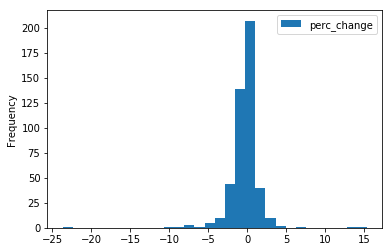

In [42]:
# Distribution of percentage change
tech_stocks.plot(y = 'perc_change', kind = 'hist', bins = 30)

Except for a few outliers, most of the stocks were in the range -5% to +5%. Plotting in this range:

(-5, 5)

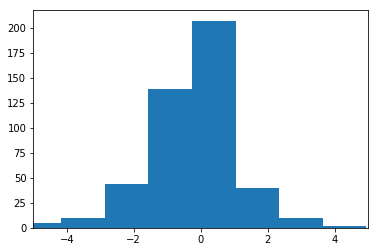

In [74]:
from matplotlib import pyplot as plt
plt.hist(tech_stocks.perc_change, bins = 30)
plt.xlim(-5, +5)

There is a slight skew to left, showing that even after excluding outliers more stocks had a -ve price change.

In [93]:
# Outliers - Stock having returns more than 3-sigma away from mean
outliers = tech_stocks.perc_change
outliers = tech_stocks[np.abs((outliers - np.mean(outliers)))/np.std(outliers)>3]
print(outliers.shape[0])
outliers

9


,name,price,change,perc_change,volume,volume_3_mth_avg,market_cap,pe_ratio,beta_3y_mthly,one_yr_target_est
symbol,,,,,,,,,,
STNE,StoneCo Ltd.,26.51,-8.23,-23.69,32482000.0,2961000.0,7.354000e+09,141.01,NaN,33.31
PAGS,PagSeguro Digital Ltd.,25.30,-2.73,-9.74,13048000.0,2291000.0,8.280000e+09,36.35,NaN,31.31
PLXS,Plexus Corp.,61.05,-4.86,-7.37,354697.0,164262.0,1.887000e+09,15.36,1.11,69.00
ADTN,"ADTRAN, Inc.",16.59,2.04,14.02,2003000.0,365724.0,7.926200e+08,NaN,1.81,15.25
VIOT,"Viomi Technology Co., Ltd",15.25,2.03,15.36,563320.0,105412.0,1.056000e+09,NaN,NaN,11.23
DAVA,Endava plc,30.00,2.10,7.53,2021000.0,47641.0,1.487000e+09,71.60,NaN,2446.30
ARCE,Arco Platform Limited,30.43,-2.22,-6.80,31007.0,64422.0,1.529000e+09,596.67,NaN,30.87
CHKP,Check Point Software Technologies Ltd.,119.99,-9.54,-7.37,5043000.0,948116.0,1.874400e+10,23.30,0.70,121.33
TEAM,Atlassian Corporation Plc,101.94,-9.25,-8.32,7539000.0,1613000.0,2.441500e+10,NaN,1.63,116.53


9 stocks wer more than 3 standard deviations away from mean for technology stocks.

In [45]:
# Performance statistics of all stocks
tech_stocks.perc_change.describe()

count    467.000000
mean      -0.237345
std        2.165550
min      -23.690000
25%       -0.790000
50%       -0.090000
75%        0.545000
max       15.360000
Name: perc_change, dtype: float64

In [52]:
# Number of stocks having -ve returns
tech_stocks[tech_stocks.perc_change < 0].shape[0]

242

242 out of 467 stocks had -ve price change.

----------

(-5, 5)

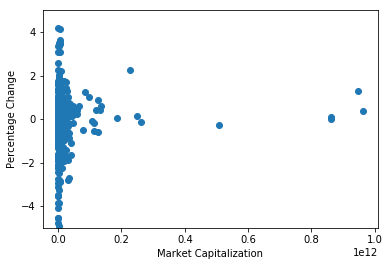

In [88]:
plt.scatter(tech_stocks['market_cap'], tech_stocks['perc_change'])
plt.xlabel('Market Capitalization')
plt.ylabel('Percentage Change')
plt.ylim(-5, +5)

There is no clear link between market capitalization and percentage change. A few stocks have very high market capitalization compared to others; maybe taking log of market capitalization will make the relationship clear.

C:\Users\sd_in\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Percentage Change')

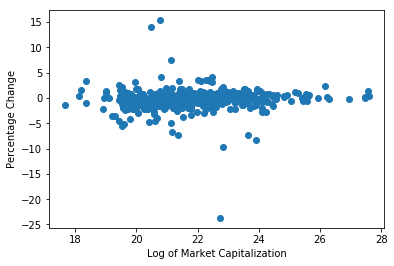

In [97]:
tech_ = tech_stocks[['market_cap', 'perc_change']]
tech_['log_m_cap'] = np.log(tech_['market_cap'])
plt.scatter(tech_['log_m_cap'], tech_['perc_change'])
plt.xlabel('Log of Market Capitalization')
plt.ylabel('Percentage Change')
#plt.ylim(-5, +5)

C:\Users\sd_in\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-5, 5)

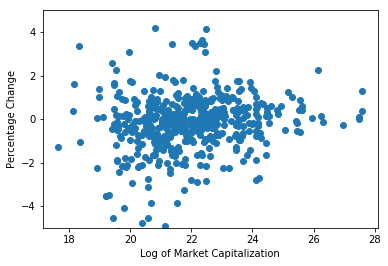

In [98]:
tech_ = tech_stocks[['market_cap', 'perc_change']]
tech_['log_m_cap'] = np.log(tech_['market_cap'])
plt.scatter(tech_['log_m_cap'], tech_['perc_change'])
plt.xlabel('Log of Market Capitalization')
plt.ylabel('Percentage Change')
plt.ylim(-5, +5)

There is no strong link between log of market capitalization and percentage change in price. Though variabilty of price change is more in low market capitalization stocks.

In [106]:
tech_stocks['mcap_category'] = pd.qcut(tech_stocks['market_cap'], [0, .25, .75, 1.], labels=["low", "medium", "high"])
tech_stocks.head(10)

,name,price,change,perc_change,volume,volume_3_mth_avg,market_cap,pe_ratio,beta_3y_mthly,one_yr_target_est,mcap_category
symbol,,,,,,,,,,,
AAPL,Apple Inc.,203.86,0.73,0.36,24196000.0,28307000.0,9.612570e+11,16.82,0.91,193.12,high
TXN,Texas Instruments Incorporated,115.51,-0.09,-0.08,4196000.0,5499000.0,1.084200e+11,20.65,1.12,109.32,high
NVDA,NVIDIA Corporation,186.30,-0.99,-0.53,9525000.0,15613000.0,1.133620e+11,28.10,2.37,183.19,high
ACN,Accenture plc,178.61,-0.34,-0.19,1279000.0,1976000.0,1.139230e+11,25.99,1.14,183.52,high
CRM,"salesforce.com, inc.",155.99,0.65,0.42,4200000.0,5305000.0,1.208730e+11,109.08,1.05,181.63,high
IBM,International Business Machines Corporation,140.33,1.22,0.88,4705000.0,4254000.0,1.248750e+11,14.77,1.68,143.72,high
AVGO,Broadcom Inc.,318.62,-1.91,-0.60,2655000.0,2694000.0,1.261240e+11,21.04,0.27,312.45,high
ADBE,Adobe Inc.,270.57,1.12,0.42,2029000.0,2871000.0,1.320250e+11,50.20,1.03,292.67,high
SAP,SAP SE,112.97,0.66,0.59,481087.0,722966.0,1.350030e+11,27.29,0.86,122.47,high


Text(0.5, 1.0, 'Percentage Change for different Market Cap')

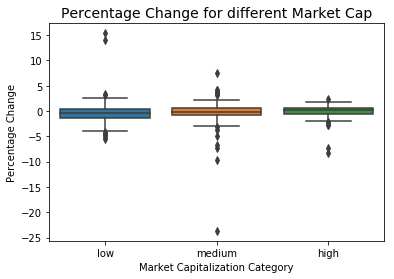

In [110]:
import seaborn as sns
sns.boxplot(x = 'mcap_category', y = 'perc_change', data=tech_stocks)
plt.xlabel('Market Capitalization Category')
plt.ylabel('Percentage Change')
plt.title('Percentage Change for different Market Cap', fontsize = 14)